# Feature and Feature collections 


- **Special requirements:** A Google account, access to Google Earth Engine.

- **Prerequisites:** You should have completed the "2.1_ENGN3903_Satellite images and bands", the "22.2_ENGN3903_Images, collections, and filters" notebooks.


## Background

**Vectors** are, in essence, geometries (lines, points, and polygons) we use for different purposes. Vectora are comprised of mathematical equations that create lines, and curves with fixed points.

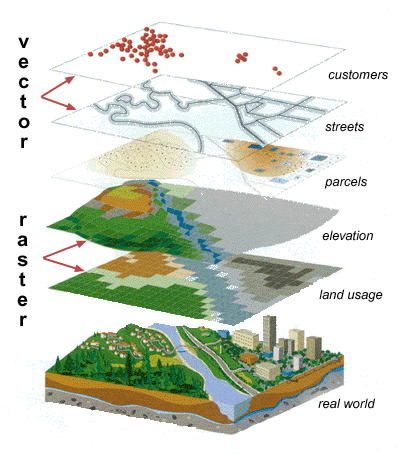

*source: https://2.bp.blogspot.com/-glpTBXbqeJ8/UBtg2hG4SAI/AAAAAAAAAFk/U-AMX2igzu0/s1600/figure1.gif*

While not strictly 'remote sensing', vectors are very useful for many things in remote sensing. For example, we can extract values from satellite images for specific polygons or points, and compare them. We can also restrict our analysis to certain areas, which, in turn, reduces processing times and the computational resources needed (*this is a good thing*). 

As an engineer you'll have to deal with vectors (e.g. geometries) *and* rasters (e.g. satellite images), so this notebook is dedicated to give you an idea of how we use verctors in common workflows.

In Google Earth Engine, a single vector is called a *Feature*, and a group of vectors is called a *Feature Collection*.

## Aims of the practical session

This practical session has three aims:

1. To demonstrate the creation of Features and Feature Collections
1. To perform opeartions with Features.
1. Use Features and Feature Collections to extract information from remote sensing data.


## Description

To achieve the aims above, 

First we will:
- Create geometries with different characteristics,
- Compare Planar versus Geodesic geometries, 
- Get information and metadata from each geometry, and
- Perform some basic geometric operations with the geometries.

Second, we will:
- Create Features and Feature Collections.
    - we will create features **with and without** geometries.

Then we will:
- Calculate the areas of each feature, and
- Intersect features

AFterwards we will:
- Load an elevation raster, and a satellite image and we'll use polygons extract information from these layers.


Let's do it!
***

## Getting started

Provide any particular instructions that the user might need, e.g. To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

Use standard import commands; some are shown below. 
Begin with any `iPython` magic commands, followed by standard Python packages, then any additional functionality you need from the `Scripts` directory.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import geemap as gmap
import ee

### Connect to Google Earth Engine (GEE)

Connect to the GEE so we can access GEE datasets and computing assets.
You may be required to input your Google account name and password. Please keep those safe and don't share them with anyone.

In [3]:
m = gmap.Map()

## Creating vectors

### Creating vectors using coodinates
Earth Engine handles vector data with the Geometry type. The [GeoJSON format](https://datatracker.ietf.org/doc/html/rfc7946) describes in detail the type of geometries supported by Earth Engine, including `Point` (a list of coordinates in some projection), `LineString`(a list of points), `LinearRing` (a closed LineString), and `Polygon` (a list of LinearRings where the first is a shell and subsequent rings are holes). 

To create a Geometry programmatically, provide the constructor with the proper list(s) of coordinates. For example:

In [4]:
# Create a point
point = ee.Geometry.Point([-35.3050, 149.1942])

# Create a line
lineString = ee.Geometry.LineString([
    [149.210342, -35.289067],
    [149.180467, -35.289628],
    [149.181154, -35.318487],
    [149.211372, -35.320168]])

# Create a linear ring - i.e. a group of lines that starts and ends in the same place
linearRing = ee.Geometry.LinearRing([[149.191316, -35.291511],
  [149.189803, -35.293858],
  [149.191756, -35.294707],
  [149.191778, -35.291546],
  [149.191316, -35.291511]])

# Create a Rectangle
rectangle = ee.Geometry.Rectangle(
      [[149.118571, -35.313094],       
       [149.13059, -35.303463]])

# Create a polygon
polygon = ee.Geometry.Polygon([[[149.173441, -35.310643],
      [149.170179, -35.311623],
      [149.169492, -35.314565],
      [149.169663, -35.317366],
      [149.170951, -35.318697],
      [149.173613, -35.318977],
      [149.175244, -35.318487],
      [149.176274, -35.316806],
      [149.177304, -35.314285],
      [149.175244, -35.310923],
      [149.173441, -35.310643]]])

In [5]:
# Let's add the polygons to the map

Map = gmap.Map(center=[-35.3050,149.1942], zoom=12)
Map.add_basemap("SATELLITE")

Map.addLayer(point,{'color':'red'},'a point - red')
Map.addLayer(lineString,{'color':'magenta'},'a line string - magenta')
Map.addLayer(linearRing,{'color':'yellow'},'a linear Ring - yellow')
Map.addLayer(rectangle,{'color':'purple'},'a rectangle - purple')
Map.addLayer(polygon,{'color':'blue'},'a polygon - blue')

Map

Map(center=[-35.305, 149.1942], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In the previous examples, note that the distinction between a `LineString` and a `LinearRing` is that the `LinearRing` is “closed” by having the same coordinate at both the start and end of the list.

An individual Geometry may consist of multiple geometries. To break a multi-part Geometry into its constituent geometries, use geometry.geometries(). For example:


In [6]:
# Create a multi-part geometry.
multiPoint = ee.Geometry.MultiPoint([
    [149.191316, -35.291511], [149.189803, -35.293858]])

# Get the individual geometries as a list.
geometries = multiPoint.geometries()

# Get each individual geometry from the list and print it.
pt1 = geometries.get(0)
pt2 = geometries.get(1)
print('Point 1', pt1)
print('Point 2', pt2)

Map.addLayer(multiPoint, {'color':'#80cdc1'}, 'pt1')


Point 1 ee.ComputedObject({
  "functionInvocationValue": {
    "functionName": "List.get",
    "arguments": {
      "index": {
        "constantValue": 0
      },
      "list": {
        "functionInvocationValue": {
          "functionName": "Geometry.geometries",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.MultiPoint",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        149.191316,
                        -35.291511
                      ],
                      [
                        149.189803,
                        -35.293858
                      ]
                    ]
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})
Point 2 ee.ComputedObject({
  "functionInvocationValue": {
    "functionName": "List.get",
    "a

### Creating vectors interactively

Another way of creating vectors was presented in the previous practical session. We can use GEE to create vectors interactively using the different functions provided by `geemap`.

Below, you'll create a series of geometries around [Uluru](https://northernterritory.com/uluru-and-surrounds/destinations/uluru), using the interactive controls (see image below).

![3.2_fig2.PNG](attachment:3.2_fig2.PNG)

### <a name="ex1"></a> Exercise 1 - Creating polygons interactively.

<div class="alert alert-block alert-danger">

First, Create a line from East to West of Uluru.

Then create a polygon around Uluru.


</div>    


In [7]:
Map2 = gmap.Map(center=[-25.3440,131.0359,], zoom=14)
Map2.add_basemap("SATELLITE")
Map2

Map(center=[-25.344, 131.0359], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [9]:
# Chech the geometries information using:
Map2.user_rois.getInfo()

{'type': 'FeatureCollection',
 'columns': {'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Polygon',
    'coordinates': [[[131.029414, -25.331892],
      [131.018089, -25.337245],
      [131.024609, -25.340658],
      [131.029414, -25.331892]]]},
   'id': '0',
   'properties': {}}]}

### Uploading vectors to GEE
Use subheadings to break up steps within a single section.

In [10]:
# Use code comments for low-level documentation of code
b = 2

## Planar versus Geodesic geometries

A geometry created in Earth Engine is either geodesic (i.e. edges are the shortest path on the surface of a sphere) or planar (i.e. edges are the shortest path in a 2-D Cartesian plane). No one planar coordinate system is suitable for global collections of geometries, so Earth Engine's geometry constructors build geodesic geometries by default. To make a planar geometry, constructors have a geodesic parameter that can be set to false:

In [11]:
# Here we create two polygons, one planar, one geodesic.
planarPolygon = ee.Geometry.Polygon([[115, -34],
      [115, -21],
      [152, -21],
      [152, -34],
      [115, -34]], None, False)

geodesicPolygon = ee.Geometry.Polygon([[115, -34],
      [115, -21],
      [152, -21],
      [152, -34],
      [115, -34]])

# Now let's see the differences in the map
Map = gmap.Map(zoom=7)
Map.centerObject(geodesicPolygon)
Map.addLayer(geodesicPolygon, {'color':'red'}, 'geodesic Plolygon')
Map.addLayer(planarPolygon, {'color':'blue'}, 'planar Plolygon')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### <a name="ex2"></a> Exercise 2 - Planar versus Geodesic.

<div class="alert alert-block alert-danger">

Try to explain the differences between planar and geodesic geometries.

When would you use one over the other? Feel free to do a web search to answer these questions and further your understanding of this topic.
    
</div>  

## Geometry information and metadata

To view information about a geometry, we can just print it. To access the information programmatically, Earth Engine provides several methods. For example, to get information about the polygon created previously, use:

In [33]:
# Print the information of the polygon. Remember that this polygon was defined in section 1.5.1
print(f'Polygon printout: {polygon.getInfo()}', )
print('\n') #This prints a white line for easier reading and interpretation.

# Print polygon area in square meters.
print(f'Polygon area: {polygon.area().getInfo()} square meters')
print('\n')

# Print polygon perimeter length in kilometers.
print(f'Polygon perimeter: {polygon.perimeter().getInfo()} meters', )
print('\n')

# Print the GeoJSON 'type'
print(f'Geometry type: {polygon.type().getInfo()}', )
print('\n')

# Print the coordinates as lists
print(f'Polygon coordinates: {polygon.coordinates().getInfo()}', )
print('\n')

# Print whether the geometry is geodesic.
print(f'Geodesic? {polygon.geodesic().getInfo()}', )      

Polygon printout: {'type': 'Polygon', 'coordinates': [[[149.173441, -35.310643], [149.170179, -35.311623], [149.169492, -35.314565], [149.169663, -35.317366], [149.170951, -35.318697], [149.173613, -35.318977], [149.175244, -35.318487], [149.176274, -35.316806], [149.177304, -35.314285], [149.175244, -35.310923], [149.173441, -35.310643]]]}


Polygon area: 505677.8231815805 square meters


Polygon perimeter: 2637.8714035840558 meters


Geometry type: Polygon


Polygon coordinates: [[[149.173441, -35.310643], [149.170179, -35.311623], [149.169492, -35.314565], [149.169663, -35.317366], [149.170951, -35.318697], [149.173613, -35.318977], [149.175244, -35.318487], [149.176274, -35.316806], [149.177304, -35.314285], [149.175244, -35.310923], [149.173441, -35.310643]]]


Geodesic? True


Note that the perimeter (or length) of a geometry is returned in meters and the area is returned in square meters unless a projection is specified. By default, the computation is performed on the WGS84 spheroid and the result is computed in meters or square meters. Sometimes, however, we need to use units different from square meters; so let's calculate the  area of the polygon in square kilometers.

In [13]:
# Print polygon area in square kilometers.
print(f'Polygon area: {polygon.area().divide(1000 * 1000).getInfo()} km^2')

# Print polygon perimeter length in kilometers.
print(f'Polygon perimeter: {polygon.perimeter().divide(1000).getInfo()} km', )

Polygon area: 0.5056778231815805 km^2
Polygon perimeter: 2.6378714035840556 km


## Geometric Operations with geometries

Earth Engine supports a wide variety of operations on `Geometry` objects. These include operations on individual geometries such as computing a buffer, centroid, bounding box, perimeter, convex hull, etc. For example:



In [14]:
# Let's re-use the geodesicPolygon we created above.

# Compute a buffer of the geodesicPolygon.
buffer = geodesicPolygon.buffer(100000)

# Compute the centroid of the geodesicPolygon.
centroid = geodesicPolygon.centroid()

Map2 = gmap.Map(zoom=7)
Map2.centerObject(buffer)
Map2.addLayer(buffer, {'color':'yellow'}, 'geodesic Plolygon')
Map2.addLayer(geodesicPolygon, {'color':'red'}, 'geodesic Plolygon')

Map2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Observe from the previous example that the buffer distance is specified in meters (i.e. 100000 m).

The following example computes and visualizes derived geometries based on the relationship between two polygons:

In [15]:
# Create two circular geometries.
circle1 = ee.Geometry.Point([128, -25]).buffer(1e6)
circle2 = ee.Geometry.Point([138, -25]).buffer(1e6)

poly1_geojson = circle1.getInfo()
poly2_geojson = circle2.getInfo()

# Display polygon 1 in red and polygon 2 in blue.
Map2.centerObject(circle1)
Map2.addLayer(circle1, {'color':'red'}, 'circle1')
Map2.addLayer(circle2, {'color':'blue'}, 'circle2')

Map2


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [16]:
# Compute the intersection, display it in cyan.
intersection = circle1.intersection(circle2, ee.ErrorMargin(1))

Map2.addLayer(intersection, {'color':'cyan'}, 'intersection of 2 polygons')

In [17]:
# Compute the union, display it in magenta.
union = circle1.union(circle2, ee.ErrorMargin(1))

Map2.addLayer(union, {'color':'magenta'}, 'union of 2 polygons')

In [18]:
# Compute the difference, display in yellow.
difference = circle1.difference(circle2, ee.ErrorMargin(1))

Map2.addLayer(difference, {'color':'yellow'}, 'difference of 2 polygons')

In [19]:
# Compute symmetric difference, display in black.
symDiff = circle1.symmetricDifference(circle2, ee.ErrorMargin(1))

Map2.addLayer(symDiff, {'color':'black'}, 'symmetric difference of 2 polygons')

In these examples, note that that maxError parameter is set to one meter for the geometry operations. The maxError is the maximum allowable error, in meters, from transformations (such as projection or reprojection) that may alter the geometry. If one of the geometries is in a different projection from the other, Earth Engine will do the computation in a spherical coordinate system, with a projection precision given by maxError. You can also specify a specific projection in which to do the computation, if necessary.



## Features

A `Feature` in Earth Engine is defined as a GeoJSON `Feature`, that is, a format to represent geographical features, along with their non-spatial attributes. 

Specifically, a `Feature` is an object that may or may not have a `Geometry` object and may or may not have a other  `properties` stored as a dictionary of attributes.

You can learn more about the GeoJSON format [here](https://en.wikipedia.org/wiki/GeoJSON).

### Creating Feature objects
To create a `Feature`, provide the constructor with a `Geometry` and (optionally) a dictionary of other properties. For example:

In [20]:
# Create an ee.Geometry.
geodesicPolygon = ee.Geometry.Polygon([[115, -34],
      [115, -21],
      [152, -21],
      [152, -34],
      [115, -34]])

# Create a Feature from the Geometry.
polyFeature = ee.Feature(geodesicPolygon, {'countryName': 'Australia', 'teamName': 'Matildas'})

As with a `Geometry`, a `Feature` may be printed or added to the map for inspection and visualization:

In [21]:
polyFeature.getInfo()

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[115, -34],
    [152, -34],
    [152, -21],
    [115, -21],
    [115, -34]]]},
 'properties': {'countryName': 'Australia', 'teamName': 'Matildas'}}

A `Feature` need not have a Geometry and may simply wrap a dictionary of properties. For example:



In [22]:
# Create a dictionary of properties, some of which may be computed values.
dict = {'number': ee.Number(8).add(88), 'university': 'ANU'}

# Create a null geometry feature with the dictionary of properties.
nowhereFeature = ee.Feature(None, dict)

# print the feature with no geometry
nowhereFeature.getInfo()

{'type': 'Feature',
 'geometry': None,
 'properties': {'number': 96, 'university': 'ANU'}}

Each `Feature` has one primary `Geometry` stored in the `geometry` property. Additional geometries may be stored in other properties. `Geometry` methods such as intersection and buffer also exist on `Feature` as a convenience for getting the primary `Geometry`, applying the operation, and setting the result as the new primary `Geometry`. The result will retain all the other properties of the `Feature` on which the method is called. There are also methods for getting and setting the non-geometry properties of the `Feature`. For example:

In [23]:
feature = ee.Feature(ee.Geometry.Point([-35.3050, 149.1942]))\
            .set('city', 'Canberra').set('state', 'NSW')

# Get a property from the feature.
city = feature.get('city')
print(city.getInfo())

# Set a new property.
feature = feature.set('population', '467,194')
print(feature.get('population').getInfo())

Canberra
467,194


Now image you made a mistake, or that you want to replace/update the information in a `Feature`.
We can do it easily.

For example, above we set the state to 'NSW', but Canberra is in the 'ACT'. Let's fix that mistake and update the information in the `Feature`.

In [24]:
# Overwrite the old properties with a new dictionary.
newDict = {'state': 'ACT'}
feature = feature.set(newDict)

# Check the result.
pprint(feature.getInfo())

{'geometry': {'coordinates': [-35.305, 149.1942], 'type': 'Point'},
 'properties': {'city': 'Canberra', 'population': '467,194', 'state': 'ACT'},
 'type': 'Feature'}


In the previous example, note that properties can be set with either a key: value pair. Also note that `feature.set()` overwrites existing properties.

## FeatureCollection 

Groups of related features can be combined into a `FeatureCollection`, to enable additional operations on the entire set such as filtering, sorting and rendering. Besides just simple features (geometry + properties), feature collections can also contain other collections.

### Creating a FeatureCollection 

One way to create a `FeatureCollection` is to provide the constructor with a `list` of features. The features do not need to have the same geometry type or the same properties. For example:

In [25]:
# Make a list of Features.
features = [
  ee.Feature(ee.Geometry.Rectangle(144.8087, -37.7442, 145.0710, -37.8611), {'name': 'Melbourne'}),
  ee.Feature(ee.Geometry.Point(153, -27), {'name': 'Brisbane'}),
  ee.Feature(ee.Geometry.Point(151.2165, -33.7913), {'name': 'Sidney'})
]

# Create a FeatureCollection from the list and print it.
cities = ee.FeatureCollection(features)
print(cities.getInfo())

Map2.addLayer(cities, {'color':'cyan'}, 'intersection of 2 polygons')
Map2

{'type': 'FeatureCollection', 'columns': {'name': 'String', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[144.8087, -37.8611], [145.071, -37.8611], [145.071, -37.7442], [144.8087, -37.7442], [144.8087, -37.8611]]]}, 'id': '0', 'properties': {'name': 'Melbourne'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [153, -27]}, 'id': '1', 'properties': {'name': 'Brisbane'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [151.2165, -33.7913]}, 'id': '2', 'properties': {'name': 'Sidney'}}]}


Map(center=[-24.998117571980167, 127.97768897914263], controls=(WidgetControl(options=['position', 'transparen…

In [44]:
Map2.user_rois.getInfo()


{'type': 'FeatureCollection',
 'columns': {'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Polygon',
    'coordinates': [[[111.005916, -44.807044],
      [111.005916, -10.959889],
      [154.952723, -10.959889],
      [154.952723, -44.807044],
      [111.005916, -44.807044]]]},
   'id': '0',
   'properties': {}},
  {'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Polygon',
    'coordinates': [[[111.709137, -44.201109],
      [111.709137, -9.951536],
      [153.722284, -9.951536],
      [153.722284, -44.201109],
      [111.709137, -44.201109]]]},
   'id': '1',
   'properties': {}}]}

A `FeatureCollection` can also be comprised of just one Feature:

In [26]:
# Create a FeatureCollection from a single geometry and print it.
fromGeom = ee.FeatureCollection(ee.Geometry.Point(16.37, 48.225))
fromGeom.getInfo()

{'type': 'FeatureCollection',
 'columns': {'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [16.37, 48.225]},
   'id': '0',
   'properties': {}}]}

## Filtering a FeatureCollection

Filtering a `FeatureCollection` is analogous to filtering an `ImageCollection`. (See the Filtering an ImageCollection section). There are the `featureCollection.filterDate()`, and `featureCollection.filterBounds()` convenience methods and the `featureCollection.filter()` method for use with any applicable `ee.Filter`. For example:

In this example we'll use the [FAO Global Administrative Boundaries Layer (GAUL)](https://geonode.wfp.org/layers/geonode%3Aadmin_2_gaul_2015) dataset that proivdes state and province delineations worldwide. However, we don't need *all* the administrative boundaries; therefore we'll only use the ones in Australia. 

In [62]:
# Create a polygon that covers roughly the Australian mainland and Tasmania
oz = ee.Geometry.Rectangle(111, -44,155, -10)

# Load watersheds from GEE, and keep only what lies within the 'oz' polygon
gaul = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2")

Map3 = gmap.Map(zoom=6)
Map3.centerObject(oz)
# Map3.addLayer(oz,{},'Australia')
Map3.addLayer(gaul, {}, 'administrative boundaries')

Map3

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are two ways to reduce the `FeatureCollection` only  to cover Australia.
We can either use the polygon to clip the `FeatureCollection`, or we can filter (i.e. select only the features we're interested in) the `FeatureCollection` using its attributes.

In [64]:
# First, we'll clip the FeatureCollection
clipped = gaul.filterBounds(oz)

Map3.addLayer(clipped, {'color':'red'}, 'cliped feature collection')
# Notice how some parts of Indonesia and Papua New Guinea were also selected using this method.


from the [FAO Global Administrative Boundaries Layer (GAUL)](https://geonode.wfp.org/layers/geonode%3Aadmin_2_gaul_2015) dataset information, we can see that the 'ADM0_NAME' corresponds to the country name, so we can use that to filter only the Australian administrative boundaries.

In [72]:
# Now let's try filtering the FeatureCollection
australianBoundaries = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Australia'))

Map3.addLayer(australianBoundaries, {'color':'cyan'}, 'filtered feature collection')

In [73]:
# Let's print out the number of individual administrative boundaries in the three different FeatureCollections.

print(f'There are {gaul.size().getInfo()} individual features in the GAUL dataset. \n')
print(f'There are {clipped.size().getInfo()} features in the "clipped" dataset. \n')
print(f'There are {australianBoundaries.size().getInfo()} features in  the "filtered" dataset.')

There are 38258 individual features in the GAUL dataset. 

There are 572 features in the "clipped" dataset. 

There are 566 features in  the "filtered" dataset.


### <a name="ex3"></a> Exercise 3 - Filtering a FeatureCollection.

<div class="alert alert-block alert-danger">

- Filter the australianBoundaries `FeatureCollection` and get only the features in Tasmania.

    
**Challenge:**
- Filter the australianBoundaries `FeatureCollection` and get the features in the Northern Territory *and* the Australian Capital Territory.
    
    
</div>    


Finally, we'll create a new attribute (i.e.a collumn) in the feature collection, and calculate the area of each administrative boundary.

to do that we need to create a `function`, and then apply the fucntion to each element in the `FeatureCollection`.

In [75]:
# This function computes the feature's geometry area and adds it as a property.
def addAreakm2(feature):
    return feature.set({'areakm2': feature.geometry().area().divide(1000000)})

# Apply or 'map' the addArea function over the FeatureCollection.
areaAdded = australianBoundaries.map(addAreakm2)

# Print the first feature from the collection with the added property.
print('First feature: \n')
pprint(areaAdded.first().getInfo())

First feature: 

{'geometry': {'coordinates': [[[133.36420431136492, -26.726739016022282],
                               [133.36645005565143, -26.71775596951963],
                               [133.31030619438798, -26.717755996767814],
                               [133.30806043070737, -26.717755983051358],
                               [133.09920515273012, -26.717755988822084],
                               [133.07450179498124, -26.675086641855806],
                               [133.04755275948443, -26.632417276417012],
                               [133.0520442848056, -26.574027597946927],
                               [133.05653578278233, -26.535849780822062],
                               [133.05429000943957, -26.481951668604797],
                               [133.065518770273, -26.43928229014717],
                               [133.0902221421835, -26.358435062300185],
                               [133.09920515273012, -26.349452046023263],
                           

In this example, note that the return value of reduceColumns() is a dictionary with key ‘mean’. To get the mean, cast the result of dictionary.get() to a number with ee.Number() before trying to call sqrt() on it. For more information about ancillary data structures in Earth Engine, see the [introduction of eeCourse]().

To overlay features on imagery, use featureCollection.reduceRegions(). For example, to compute the volume of precipitation in continental US watersheds, use reduceRegions() followed by a map():

In [114]:
# Load the MODIS NDVI images for the 2019-2020 summer.
NDVI = ee.ImageCollection('MODIS/006/MOD13A2') \
    .filterDate('2019-01-01', '2020-12-31') \
    .select('NDVI') \
    .median() 

# Calculate median NDVI values within Australian administrative boundary. It is
# good practice to explicitly define "scale" (or "crsTransform") and "crs"
# parameters of the analysis to avoid unexpected results from undesired
# defaults when e.g. reducing a composite image.
withNDVI = NDVI.reduceRegions(
    collection = australianBoundaries,
  reducer= ee.Reducer.median(),
  scale= 500,  # meters
  crs= 'EPSG:3577' # GDA94 Australian Albers projection
)

# The input feature collection (i.e. australianBoundaries) is returned with new properties appended.
# The new properties are the outcome of the region reduction per image band,
# for each feature in the collection. Region reduction property names
# are the same as the input image band names.
print('Median band values', withNDVI)


Median band values ee.FeatureCollection({
  "functionInvocationValue": {
    "functionName": "Image.reduceRegions",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.loadTable",
                "arguments": {
                  "tableId": {
                    "constantValue": "FAO/GAUL_SIMPLIFIED_500m/2015/level2"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.equals",
                "arguments": {
                  "leftField": {
                    "constantValue": "ADM0_NAME"
                  },
                  "rightValue": {
                    "constantValue": "Australia"
                  }
                }
              }
            }

In [115]:
Map4 = gmap.Map(zoom=6)
Map4.centerObject(oz)
Map4.addLayer(NDVI,{'palette': ['00224e', ' 575d6d', ' a59c74', ' fee838'], 'min': 0.0, 'max': 10000.0, },'median NDVI')
Map4.addLayer(withNDVI, {}, 'with NDVI')
Map4

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [129]:
withNDVI.first().getInfo()

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[133.36420431136492, -26.726739016022282],
    [133.36645005565143, -26.71775596951963],
    [133.31030619438798, -26.717755996767814],
    [133.30806043070737, -26.717755983051358],
    [133.09920515273012, -26.717755988822084],
    [133.07450179498124, -26.675086641855806],
    [133.04755275948443, -26.632417276417012],
    [133.0520442848056, -26.574027597946927],
    [133.05653578278233, -26.535849780822062],
    [133.05429000943957, -26.481951668604797],
    [133.065518770273, -26.43928229014717],
    [133.0902221421835, -26.358435062300185],
    [133.09920515273012, -26.349452046023263],
    [133.10818819653886, -26.35169775470679],
    [133.1126796750874, -25.99911412931091],
    [133.0902221421835, -25.9991141377034],
    [133.07450179498124, -25.9991141750046],
    [133.00937494033715, -25.999114121329868],
    [132.9936545927506, -25.999114186772445],
    [132.41424967031782, -25.999114098636277],
    [13

### <a name="ex4"></a> Exercise 4 - getting arster data into a Feature Collection.

<div class="alert alert-block alert-danger">

- Filter the australianBoundaries `FeatureCollection` and get only the features in Queensland.
- Add the **maximum** NDVI to those features
    
**Challenge:**
- Filter the australianBoundaries `FeatureCollection` and get the features in the Western Australia *and* the Australian Capital Territory.
- Add the maximum **NDWI** value to those features.
    
    
</div>    


## References



***

## Additional information

**License:** The code in this notebook was modified by Nicolas Younes, and adapted from [Google Earth Engine Guides](https://developers.google.com/earth-engine/), and Cesar Aybar's [Google Earth Engine with Python (EEwPython)](https://github.com/csaybar/EEwPython).
The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle (**check**) site 

**Last modified:** May 2022